In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw09.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Homework 9: Sample Sizes and Confidence Intervals

**Helpful Resource:**

- [Python Reference](http://data8.org/fa24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Estimation](https://inferentialthinking.com/chapters/13/Estimation.html)
* [Why the Mean Matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

Please complete this notebook by filling in the cells provided. **Before you begin, execute the cell below to setup the notebook by importing some helpful libraries.** Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Wednesday, 11/6 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/fa24/policies/) page. Turn it in by Tuesday, 11/5 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/fa24/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren) 101B. The office hours schedule appears [here](http://data8.org/fa24/schedule/).

---

The point breakdown for this assignment is given in the table below:
| Category | Points |
| --- | --- |
| Autograder (Coding questions) | 64 |
| Written | 36 |
| **Total** | 100 |

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Bounding the Tail of a Distribution

A community has an average age of 45 years with a standard deviation of 5 years. **We do not know how the ages are distributed.**

In each part below, fill in the blank with a percent that makes the statement true **without further assumptions**, and **explain your answer**.

*Note:* No credit will be given for loose bounds such as "at least 0%" or "at most 100%". Give the best answer that is possible with the information given.

> ***Please review [Section 14.2](https://inferentialthinking.com/chapters/14/2/Variability.html) of the textbook before proceeding with this section. You will be able to understand and solve the problems more efficiently!***

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 1.1.** At least 93.75% of the people are between 25 and 65 years old. Explain your answer! **(6 Points)**

Following Chebychev's Bound, the proportion of people have ages in the range average $\plusmn$ 4SDs (25-65) is at least $1 - \frac{1}{4^2} = 0.9375$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 1.2.** At most 6.25% of the people have ages that are not in the range 25 years to 65 years. Explain your answer! **(6 Points)**

Following Chebychev's Bound, the proportion of people have ages in the range average $\plusmn$ 4SDs (25-65) is at least $1 - \frac{1}{4^2} = 0.9375$. So the proportion of people have ages that are not in this range is $1 - 0.9375 = 0.0625$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 1.3.** At most 3.125% of the people are more than 65 years old. Explain your answer! **(6 Points)**

*Hint:* If you're stuck, try thinking about what the distribution may look like in this case.


Following Chebychev's Bound, the proportion of people have ages that are not in the range 25 years to 65 years is $1 - 0.9375 = 0.0625$. So at most $0.0625 / 2 * 100 = 3.125%$ people are more than 65 years old.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. Sample Size and Confidence Level

A data science class at the large Data 8 University wants to estimate the percent of Facebook users among students at the school. To do this, they need to take a random sample of students. You can assume that their method of sampling is equivalent to drawing at random with replacement from students at the school.

> ***Please review [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook before proceeding with this section. There is a helpful formula that will help you solve the problems!***

<hr style="border: 1px solid #fdb515;" />

**Question 2.1.** Assign `smallest` to the smallest number of students they should sample to ensure that a **95%** confidence interval for the parameter has a width of no more than 6% from left end to right end. **(6 points)**

*Hint:* How can our data be represented to show if a student in the sample is a Facebook user or not? Given this, what assumptions can we make for the SD of the population? [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) might be helpful!

*Note:* While the true smallest sample size would have to be an integer, please leave your answer in decimal format for the sake of our tests.


We need to construct a confidence interval for the probability that a student is a Facebook user.

Following Central Limit Theorem, The distribution of p will have bell shape (Standard Distribution):
- Assuming that average of p is $\hat{p}$.
- Standard deviation of p is $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.

95% confidence interval for p is $\hat{p} \plusmn 2.\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.
The width of the 95% confidence interval is $4.\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.
$$4.\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq 0.06$$
$$\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq 0.015$$
Because we don't know the value of $\hat{p}$ (the probality of population), we can take the maximum value of $\hat{p}(1-\hat{p})$ which is $0.5*0.5=0.25$.
$$\sqrt{\frac{0.25}{n}} \leq 0.015$$
$$\sqrt{n} >= \frac{\sqrt{0.25}}{0.015}$$
$$n >= 1111.11$$
Because n must be an interger, so the smallest sample size is 1112.


In [4]:
smallest = 1112
smallest

1112

In [5]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 2.2.** Suppose the data science class decides to construct a 90% confidence interval instead of a 95% confidence interval, but they still require that the width of the interval is no more than 6% from left end to right end. Will they need the same sample size as in 2.1? Pick the right answer and explain further without calculation. **(6 Points)**

1. Yes, they must use the same sample size.
2. No, a smaller sample size will work.
3. No, they will need a bigger sample.


We need to construct a confidence interval for the probability that a student is a Facebook user.

Following Central Limit Theorem, The distribution of p will have bell shape (Standard Distribution):
- Assuming that average of p is $\hat{p}$.
- Standard deviation of p is $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.

95% confidence interval for p is $\hat{p} \plusmn 1.65*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.
The width of the 95% confidence interval is $3.3*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.
$$3.3*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq 0.06$$
$$\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq 0.01819$$
Because we don't know the value of $\hat{p}$ (the probality of population), we can take the maximum value of $\hat{p}(1-\hat{p})$ which is $0.5*0.5=0.25$.
$$\sqrt{\frac{0.25}{n}} \leq 0.01819$$
$$\sqrt{n} >= \frac{\sqrt{0.25}}{0.01819}$$
$$n >= 755.57$$
Because n must be an interger, so the smallest sample size is 756.


<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 2.3.** The professor tells the class that a 90% confidence interval for the parameter is constructed exactly like a 95% confidence interval, except that you have to go only **1.65 SDs** on either side of the estimate (±1.65) instead of **2 SDs** on either side (±2). Assign `smallest_num` to the smallest number of students they should sample to ensure that a **90%** confidence interval for the parameter has a **width of no more than 6%** from left end to right end. **(6 points)**

*Note:* While the true smallest sample size would have to be an integer, please leave your answer in decimal format for the sake of our tests.


In [33]:
smallest_num = 756
smallest_num

756

In [21]:
grader.check("q2_3")

q2_3 results: All test cases passed!

For this next exercise, please consult [Section 14.3.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf) of the textbook for similar examples.

Colin and Marissa are curious about how the professor came up with the value 1.65 in Question 2.3. The professor says he ran the following two code cells. The first one calls the `datascience` library function `plot_normal_cdf`, which displays the proportion that is at most the specified number of SDs above average under the normal curve plotted with standard units on the horizontal axis. You can find the documentation [here](http://data8.org/datascience/util.html#datascience.util.plot_normal_cdf).

*Note:* The acronym `cdf` stands for `cumulative distribution function`. It measures the proportion to the left of a specified point under a probability histogram.

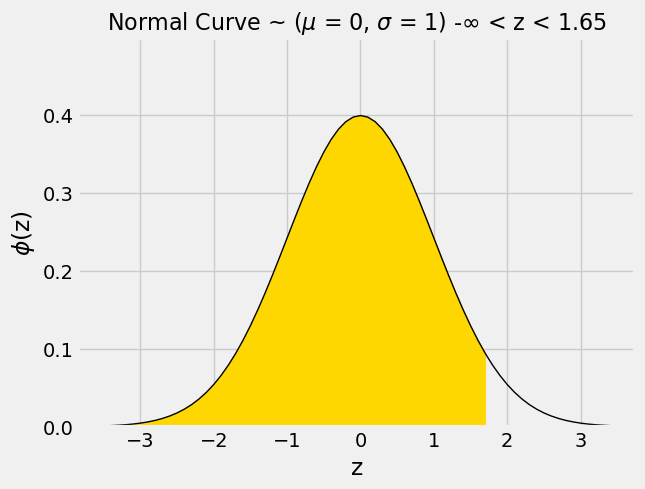

In [22]:
plot_normal_cdf(1.65)

To run the second cell, the professor had to first import a Python library for probability and statistics:

In [23]:
# Just run this cell
from scipy import stats

Then she used the `norm.cdf` method in the library to find the gold proportion above.

In [24]:
# Just run this cell
stats.norm.cdf(1.65)

0.9505285319663519

This means that roughly 95% of our data lies to the left of +1.65 SDs from the mean (the shaded area in yellow above).

*Note*: You do not need to understand how the `scipy` library or how to use the method yourself.

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 2.4.** This shows that the percentage in a normal distribution that is at most 1.65 SDs above average is about **95%**. Explain why 1.65 is the right number of SDs to use when constructing a **90%** confidence interval. **(6 Points)**


Since 95% of the data are below 1.65 SDs, the remaining 5% lies above 1.65 SDs. Therefore, the interval defined by the mean ± 1.65 SDs will contain 90% of the data, assuming a symmetric distribution.

<!-- END QUESTION -->



In [25]:
# Just run this cell, do not change it.
stats.norm.cdf(2.33)

0.99009692444083575

<hr style="border: 1px solid #fdb515;" />

**Question 2.5.** The cell above shows that the proportion that is at most 2.33 SDs above average in a normal distribution is 99%. Assign `option` to the right option to fill in the blank: **(6 points)**

If you start at the estimate and go 2.33 SDs on either side, then you will get a _______% confidence interval for the parameter.

1. 99.5
2. 99
3. 98.5
4. 98

_Note:_ `option` should be assigned to one of `1`, `2`, `3`, or `4` depending on which answer is correct. 



In [26]:
option = 4
option

4

In [27]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3. Polling and the Normal Distribution

Ella is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal and vertical axes, unrelated to any real California proposition) called Yes on 68.  They want to know how many Californians will vote for the proposition.

Ella polls a random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. We have provided a table for you below which has 3 columns: the first two columns are identical to `sample`. The third column contains the proportion of total voters that chose each option.

In [28]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))

sample_size = sum(sample.column("Count"))
sample_with_proportions = sample.with_column("Proportion", sample.column("Count") / sample_size)
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


<hr style="border: 1px solid #fdb515;" />

**Question 3.1.** Ella wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  

Fill in the next cell to simulate an empirical distribution of Yes proportions. Use bootstrap resampling to simulate 10,000 election outcomes, and assign `resample_yes_proportions` to contain the Yes proportion of each bootstrap resample. Then, visualize `resample_yes_proportions` with a histogram. **You should see a bell shaped histogram centered near the proportion of Yes in the original sample.** **(6 points)**

*Hint:* `sample_proportions` may be useful here!


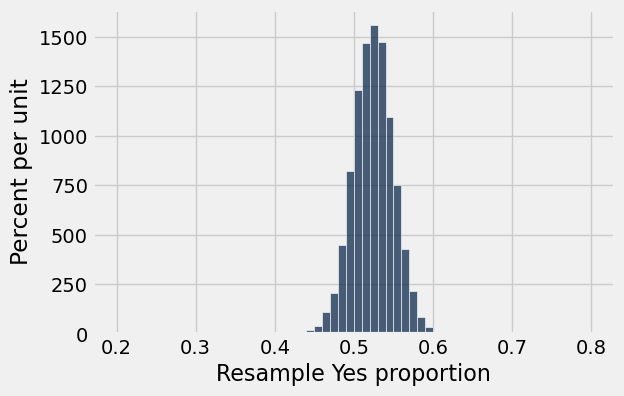

In [34]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(400, sample_with_proportions.column('Proportion'))
    resample_yes_proportions = np.append(resample_yes_proportions, resample[0])
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [32]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

**Question 3.2.** Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above? We recommend reviewing [14.4](https://inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html) for a refresher on CLT. **(6 points)**


The probability distribution of the average of a large random sample drawn with replacement will be roughly normal. So our distribution will have bell shape.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

In a population whose members are represented as either a 0 or 1, there is a simple formula for the **standard deviation of that population**:

$$\text{standard deviation of population} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

**Question 3.3.** Using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, *algebraically* compute the predicted standard deviation of the `resample_yes_proportions` array. Assign this number to `approximate_sd`. **Do not access the data in `resample_yes_proportions` in any way.** **(6 points)**

Remember that the standard deviation of the sample means can be computed from the population SD and the size of the sample (the formula above might be helpful). If we do not know the population SD, we can use the sample SD as a reasonable approximation in its place. 

_Note:_ Section [14.5.1](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means) of the textbook may be helpful.


In [37]:
approx_pop_sd = np.sqrt((210 / 400) * (190 / 400))
approximate_sd = approx_pop_sd / np.sqrt(400)
approximate_sd

0.024968730444297725

In [38]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Compute the standard deviation of the array `resample_yes_proportions`, which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to question 3.3 is approximately correct. **(6 points)**


In [39]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.025051503742290607

In [40]:
grader.check("q3_4")

q3_4 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 3.5.** **Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California. **(6 points)**

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs corresponds to 95% of the distribution promised by the CLT? Recall the discussion in the textbook [here](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

*Hint:* The `approximate_sd` variable you previously defined may be helpful!


In [42]:
yes_in_population = 210 / 400
lower_limit = yes_in_population - 2 * approximate_sd
upper_limit = yes_in_population + 2 * approximate_sd
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.475062539111 upper: 0.574937460889


In [43]:
grader.check("q3_5")

q3_5 results: All test cases passed!

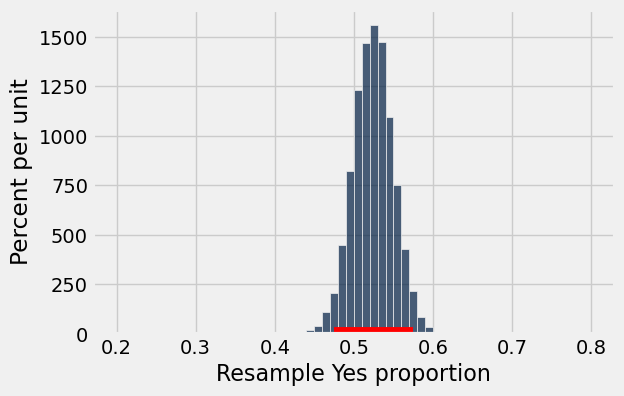

In [44]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Ella to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Ella consults Chapter 14 of the textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

**Under that assumption, Ella decides that a sample of 9,975 would suffice.**

Does Ella's sample size achieve the desired standard deviation of sample means? What SD would you achieve with a smaller sample size? A higher sample size?

<hr style="border: 1px solid #fdb515;" />

**Question 3.6.** To explore this, first compute the SD of sample means obtained by using Ella's sample size and assign it to `ella_sample_mean_sd`. **(6 points)**


In [45]:
estimated_population_sd = np.sqrt((210 / 400) * (190 / 400))
ella_sample_size = 9975
ella_sample_mean_sd = estimated_population_sd / np.sqrt(ella_sample_size)
print("With Ella's sample size, you would predict a sample mean SD of %f." % ella_sample_mean_sd)

With Ella's sample size, you would predict a sample mean SD of 0.005000.


In [46]:
grader.check("q3_6")

q3_6 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 3.7.** Next, compute the SD of sample means that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Ella's will do. **(5 points)**


In [48]:
smaller_sample_size = 3600
smaller_sample_mean_sd = estimated_population_sd / np.sqrt(smaller_sample_size)
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)

With this smaller sample size, you would predict a sample mean SD of 0.008323


In [49]:
grader.check("q3_7")

q3_7 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 3.8.** Finally, compute the SD of sample means that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Ella's will do. **(5 points)**

In [50]:
larger_sample_size = 10000
larger_sample_mean_sd = estimated_population_sd / np.sqrt(larger_sample_size)
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)

With this larger sample size, you would predict a sample mean SD of 0.004994


In [51]:
grader.check("q3_8")

q3_8 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 3.9.** Based off of this, was Ella's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if 9,975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't. **(4 points)**


In [52]:
min_sufficient = True
min_sufficient

True

In [53]:
grader.check("q3_9")

q3_9 results: All test cases passed!

You're done with Homework 9!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com/courses/835871) and submit the zip file to the corresponding assignment. The name of this assignment is "HW 09 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Pets of Data 8
**Ball** made a song for you as congratulations for finishing homework 9. Here's a couple of the lyrics!

**From the fort, to the night, to the den, to the king. Where's my crown?**

<img src="./ball.jpg" width="40%" alt="Netherland dwarf bunny with a silver crown"/>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Written Work Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> Webpdf`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit one single PDF of your screenshots. Either way, **you are responsible for ensuring your submision follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [ ]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw09'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)